# Determination of p_bleach
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.
Bleaching probability per particle and frame. The higher p_bleach, the more reluctant swift makes connections. <br/>
swift --out_values: mjd_n

## Choose a localization software

In [1]:
from pySPT.widgets import widgetDirectoryStructure
from pySPT.widgets import widgetColumnSort
from pySPT.widgets import widgetPBleach
from pySPT.preAnalysis import pBleach
widget_p_bleach = widgetPBleach.WidgetPBleach()
display(widget_p_bleach.software_button)

RadioButtons(options=('ThunderSTORM', 'rapidSTORM'), value='ThunderSTORM')

## Load file

thunderSTORM: Insert the full file path of the tracked seg file with .csv ending or browse for it. Example path: F:\resting\160404_CS5\cell05.tracked.csv) <br/>
rapidSTORM: Insert the full file path of the tracked seg file with .txt ending or browse for it. (Example path: F:\resting\160404_CS5\cell05.tracked.txt)

In [2]:
p_bleach = pBleach.PBleach()
widget_dir_structure = widgetDirectoryStructure.WidgetDirStructure()
display(widget_p_bleach.file_text_box, widget_p_bleach.file_button)
widget_p_bleach.file_button.on_click(widget_p_bleach.open_file)
widget_p_bleach.file_text_box.observe(widget_p_bleach.change_file_box)

Text(value='', description='Complete path', placeholder='Insert path', style=DescriptionStyle(description_widt…

Button(description='browse', style=ButtonStyle(), tooltip='browse for file')

## Run Analysis

Insert an inital k value for the exponential fit (a·exp(-k·t)) and the camera integration time. Optionally, mask points in for the fit starting from t = 0 (number of points = 0 -> no points are masked).

In [3]:
widget_dir_structure.name_handling(widget_p_bleach.file_name)
widget_dir_structure.create_raw_base_name()
display(widget_p_bleach.init_k, widget_p_bleach.integration_time, widget_p_bleach.ignore_points)

Text(value='0.5', description='Initial k [s⁻¹]', placeholder='Type something', style=DescriptionStyle(descript…

Text(value='0.02', description='Camera integration time [s]', placeholder='insert path', style=DescriptionStyl…

Text(value='0', description='Number of points', placeholder='Type something', style=DescriptionStyle(descripti…

The exponential fit will yield k and its variance kv, p_bleach is calculated via a cumulative distribution function (f(dt, k)) in the range from 0 to 1 frame.

Button(description='run', style=ButtonStyle(), tooltip='run the analysis')

Results: p_bleach = 0.016, k = 8.0554e-01 s⁻¹, kv = 1.2179e-04 s⁻²


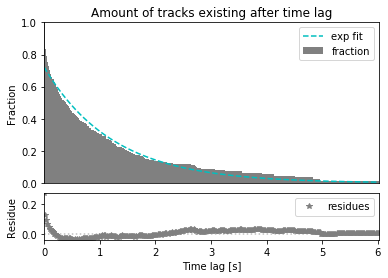

In [4]:
display(widget_p_bleach.run_button)
def run_analysis(event):
    widget_p_bleach.create_clear_output()
    display(widget_p_bleach.run_button)
    if widget_p_bleach.got_file_name:
        widget_column_sort = widgetColumnSort.WidgetColumnSort(widget_p_bleach.file_text_box.value, widget_p_bleach.software_button.value, ['"seg.id"', '"seg.mjd_n"'])
        widget_column_sort.check_header()
        if widget_column_sort.correct_header:
            widget_column_sort.run_column_sort()
            p_bleach.ignore_points = int(widget_p_bleach.ignore_points.value)
            p_bleach.file_name = widget_p_bleach.file_text_box.value
            p_bleach.software = widget_p_bleach.software_button.value
            p_bleach.column_order = widget_column_sort.column_order
            p_bleach.dt = float(widget_p_bleach.integration_time.value) 
            p_bleach.init_k = float(widget_p_bleach.init_k.value)
            p_bleach.file_name = widget_p_bleach.file_text_box.value
            p_bleach.run_p_bleach()
        else:
            widget_p_bleach.warning_wrong_file()
    else:
        widget_p_bleach.warning_wrong_file_path()
widget_p_bleach.run_button.on_click(run_analysis)

## Save results

The results and the histogram will be saved in .txt files with columns: amout of frames, duration of a trajectory [s], fraction, exponential fit, residues.

In [5]:
display(widget_p_bleach.save_plot_checkbox, widget_p_bleach.save_button)
def save_analysis(event):
    widget_p_bleach.create_clear_output()
    display(widget_p_bleach.save_plot_checkbox, widget_p_bleach.save_button)
    widget_dir_structure.name_handling(widget_p_bleach.file_text_box.value)
    widget_dir_structure.create_raw_base_name()
    widget_dir_structure.sub_folder = "\\preAnalysis"
    widget_dir_structure.create_folder()
    p_bleach.save_fit_results(widget_dir_structure.sub_folder_dir, widget_dir_structure.raw_base_name)
    p_bleach.save_mjd_n_frequencies(widget_dir_structure.sub_folder_dir, widget_dir_structure.raw_base_name)
    if widget_p_bleach.save_plot_checkbox.value:
        p_bleach.save_plot(widget_dir_structure.sub_folder_dir, widget_dir_structure.raw_base_name)
widget_p_bleach.save_button.on_click(save_analysis)

Checkbox(value=True, description='Save plot')

Button(description='save', style=ButtonStyle(), tooltip='save the results')